# 毕业论文`GRAD`
## `MCIP`气象场分析

---
*@author: Evan*\
*@date: 2023-12-19*

In [1]:
import numpy as np
import os

import sys
sys.path.append('../../../src/')
from namelist import *
from mask import average_data
from spatial import plot_PRD_map, plot_PRD_diff

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [2]:
var = 'SOL_RAD'
years = np.array([2022,2021,2019]) # 此处年份倒置是为了方便后续创建dataarray时取用时间维度

summer_files = [os.path.join(processed_dir, f"Jul_{year}/Jul_{year}_mcip.nc") for year in years]
autumn_files = [os.path.join(processed_dir, f"Sep_{year}/Sep_{year}_mcip.nc") for year in years]

avg_summer    = average_data(summer_files, var)
avg_autumn    = average_data(autumn_files, var)
avg_summer_uw = average_data(summer_files, 'uwind')
avg_autumn_uw = average_data(autumn_files, 'uwind')
avg_summer_vw = average_data(summer_files, 'vwind')
avg_autumn_vw = average_data(autumn_files, 'vwind')

In [3]:
# 辐射取日最大值的月平均值
mean_summer = avg_summer.resample(time='D').max(dim='time').mean(dim='time')
mean_autumn = avg_autumn.resample(time='D').max(dim='time').mean(dim='time')

uwind_summer = avg_summer_uw.mean(dim='time')
uwind_autumn = avg_autumn_uw.mean(dim='time')
vwind_summer = avg_summer_vw.mean(dim='time')
vwind_autumn = avg_autumn_vw.mean(dim='time')

In [12]:
cmin=900
cmax=1100
cmstep=1
cbstep=100

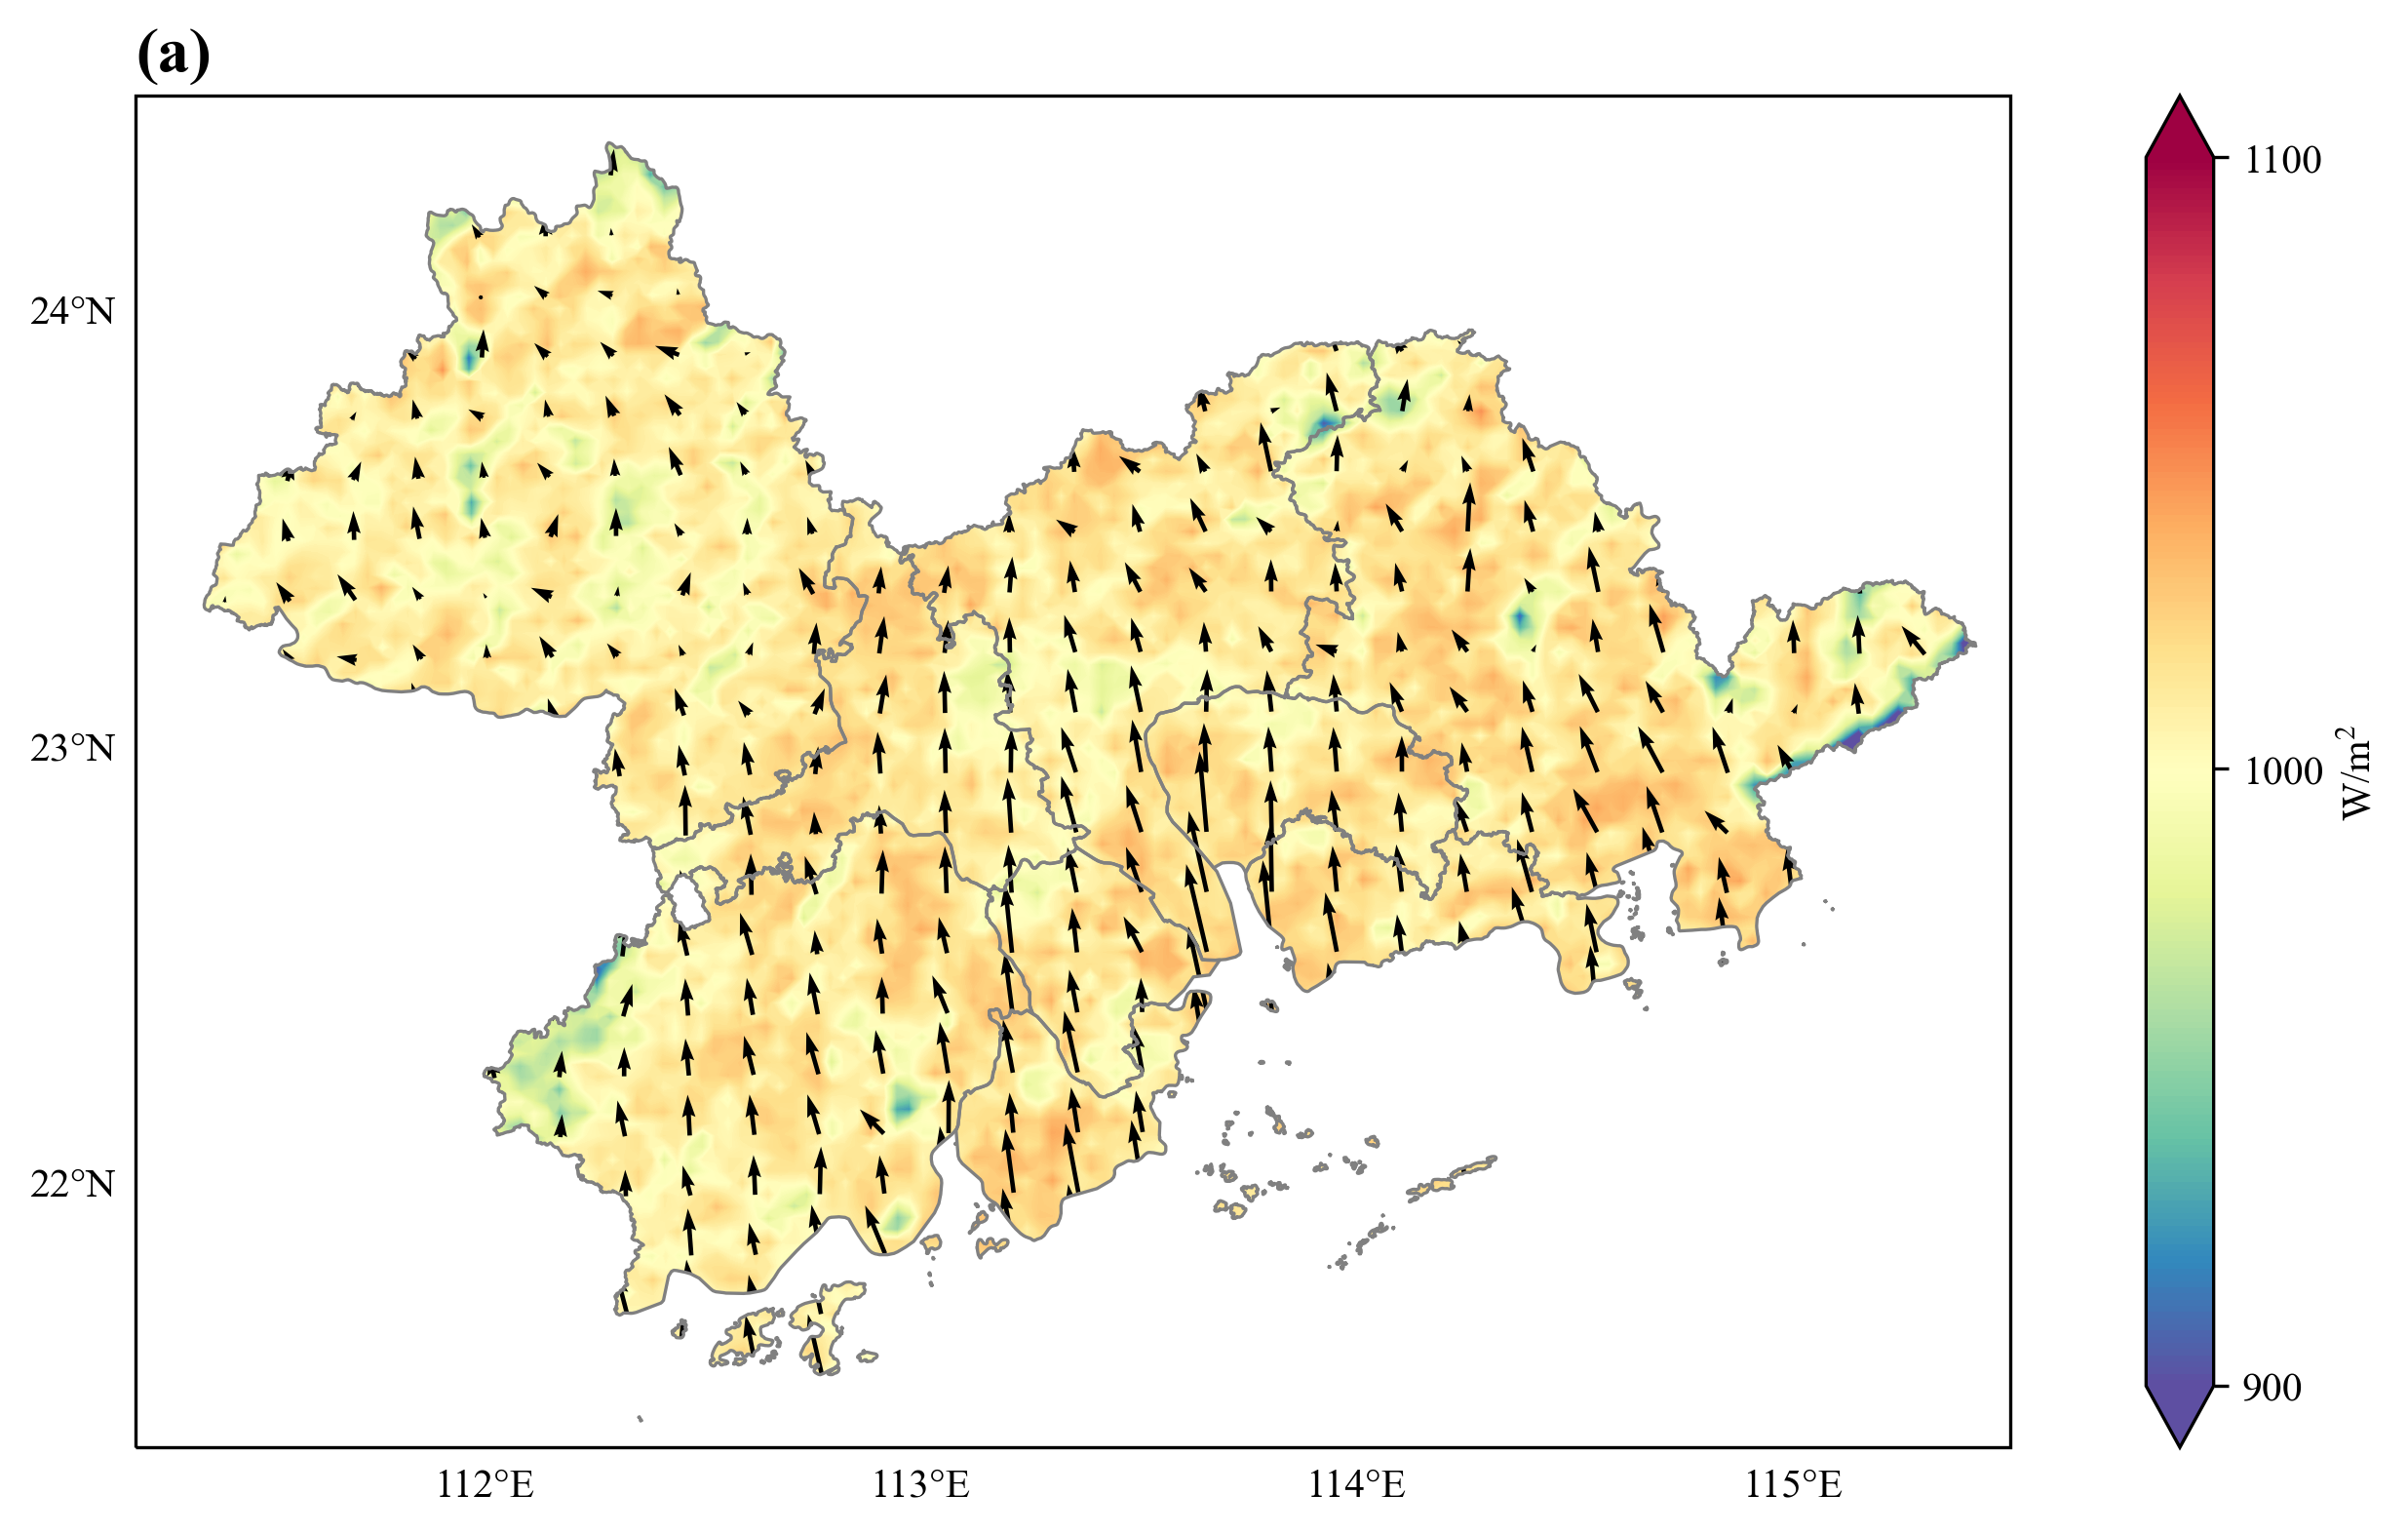

In [13]:
plot_PRD_map(avg_summer, cmin, cmax, cmstep, cbstep,
             mean_summer, uwind_summer, vwind_summer,
             ngrid=5, scale=100, headwidth=3,
             title='(a)', colorbar_label='W/m$^2$')

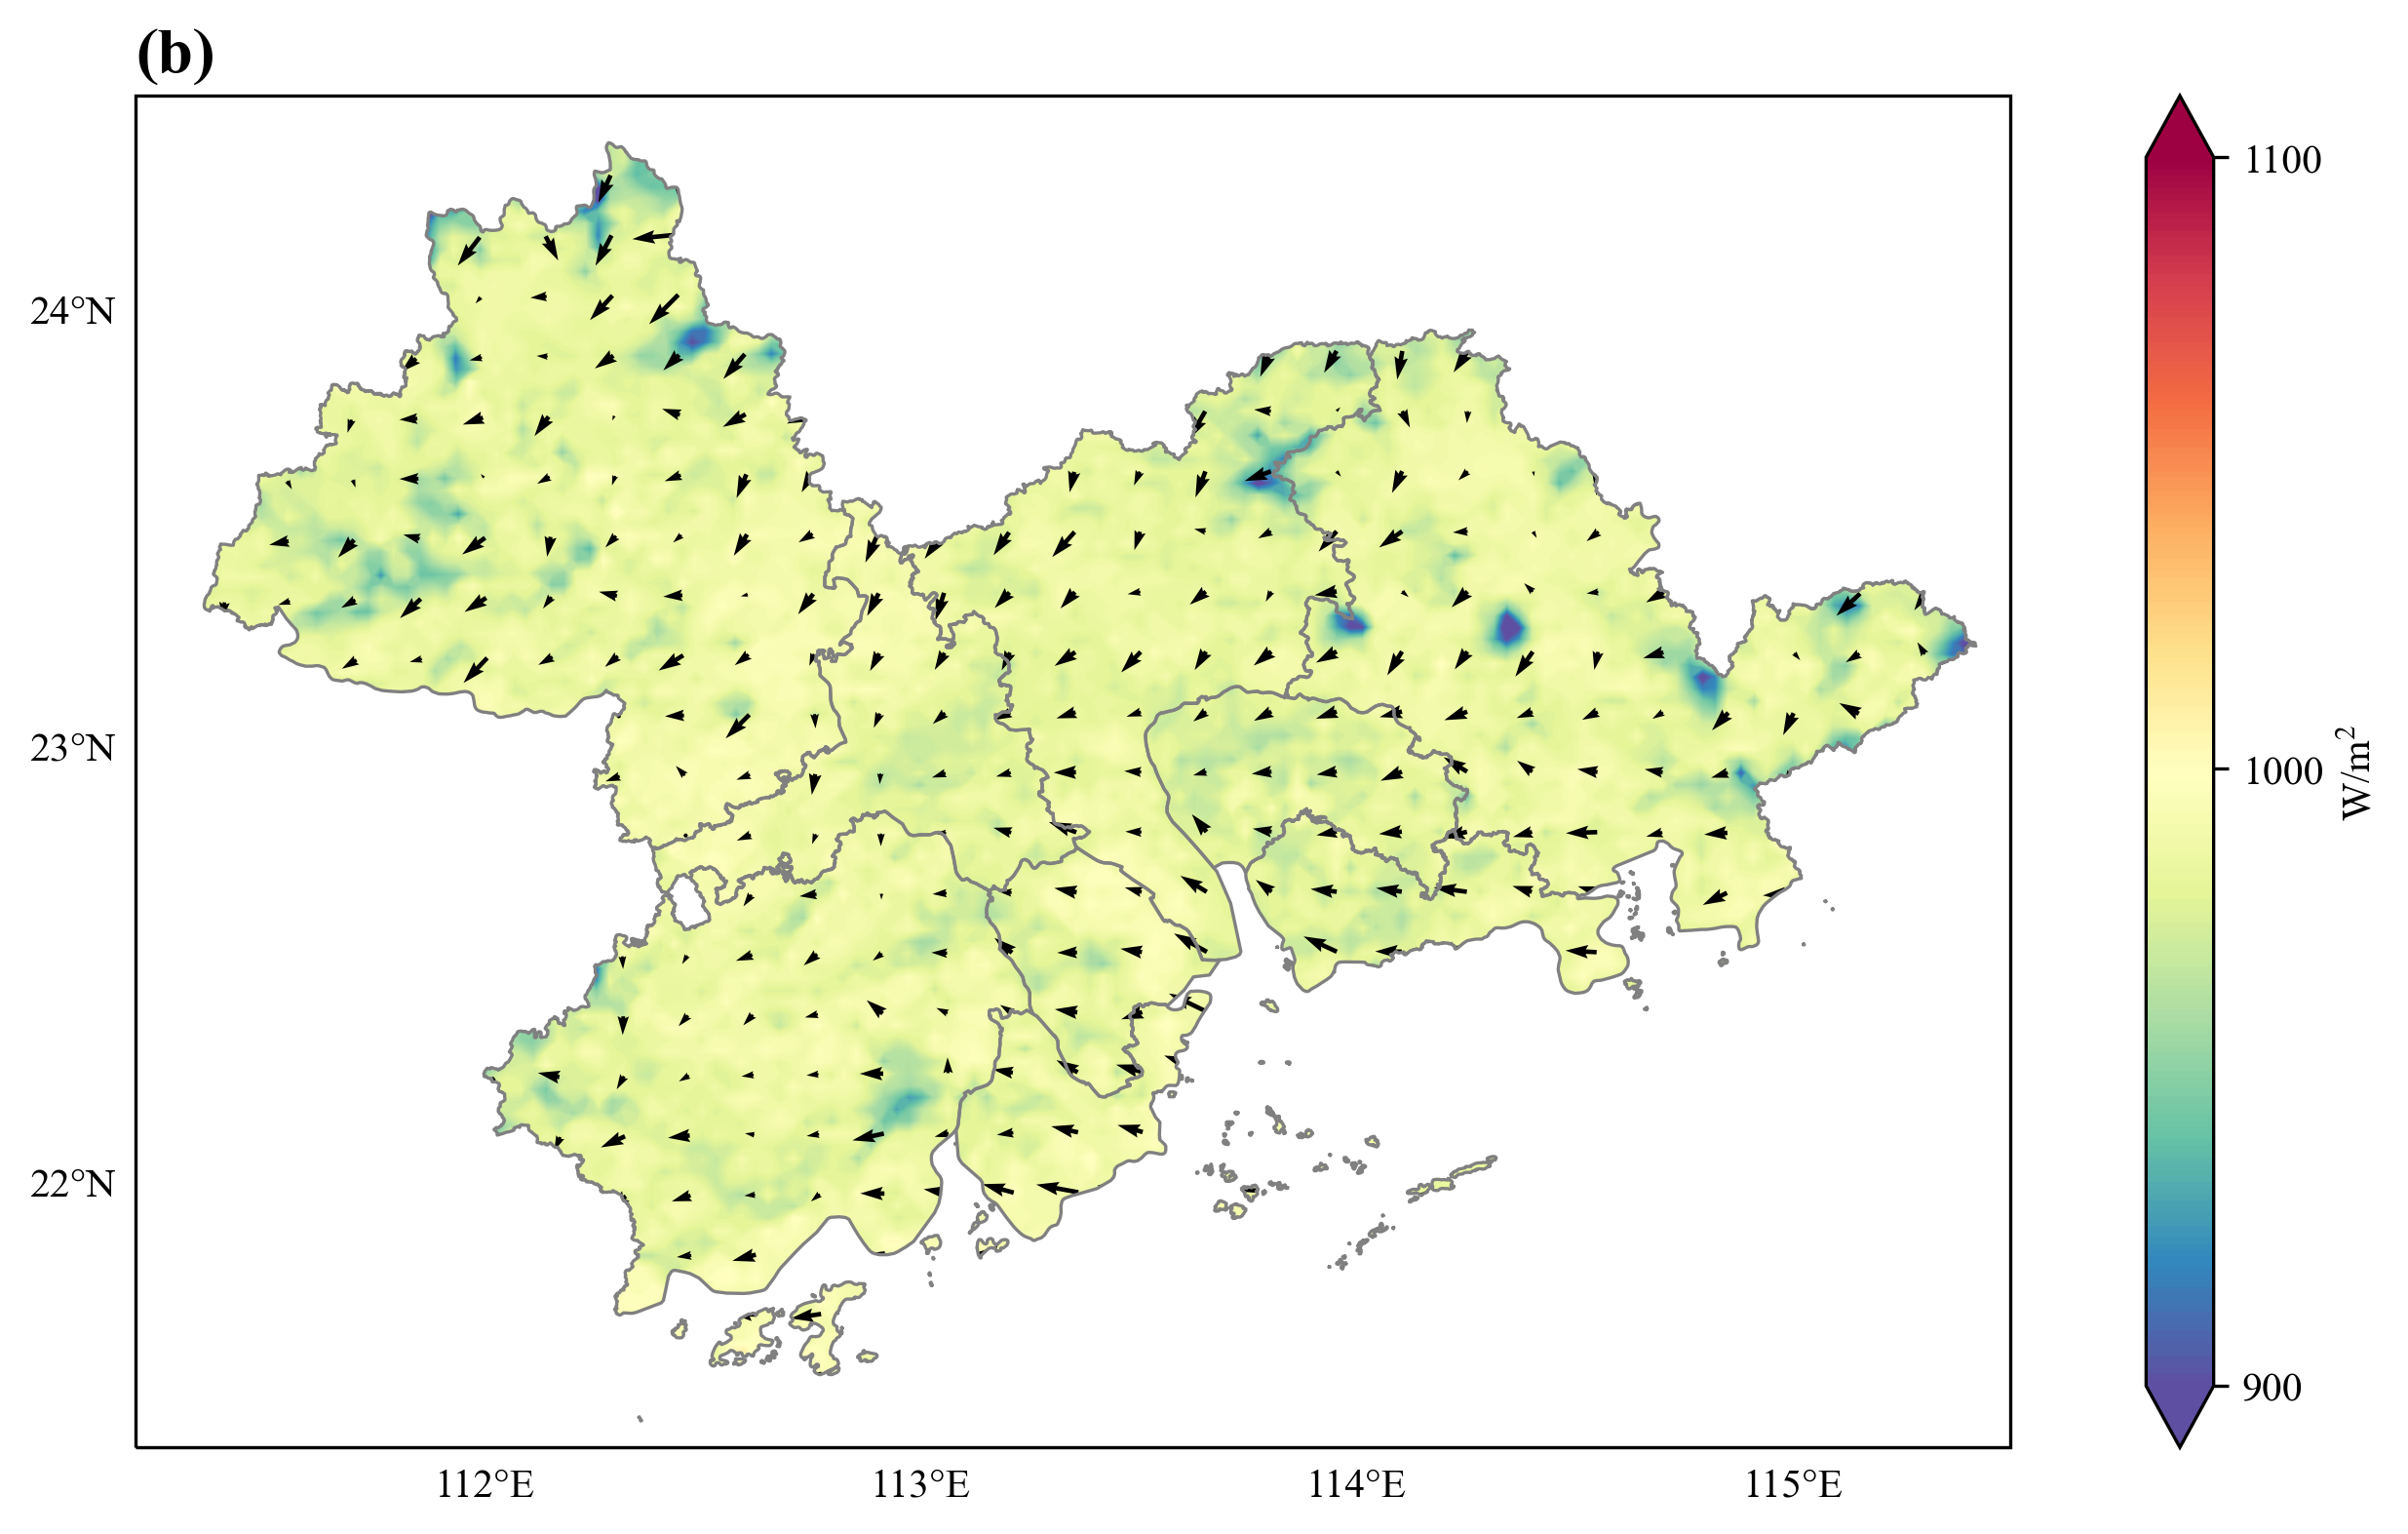

In [14]:
plot_PRD_map(avg_summer, cmin, cmax, cmstep, cbstep,
             mean_autumn, uwind_autumn, vwind_autumn,
             ngrid=5, scale=100, headwidth=3,
             title='(b)', colorbar_label='W/m$^2$')

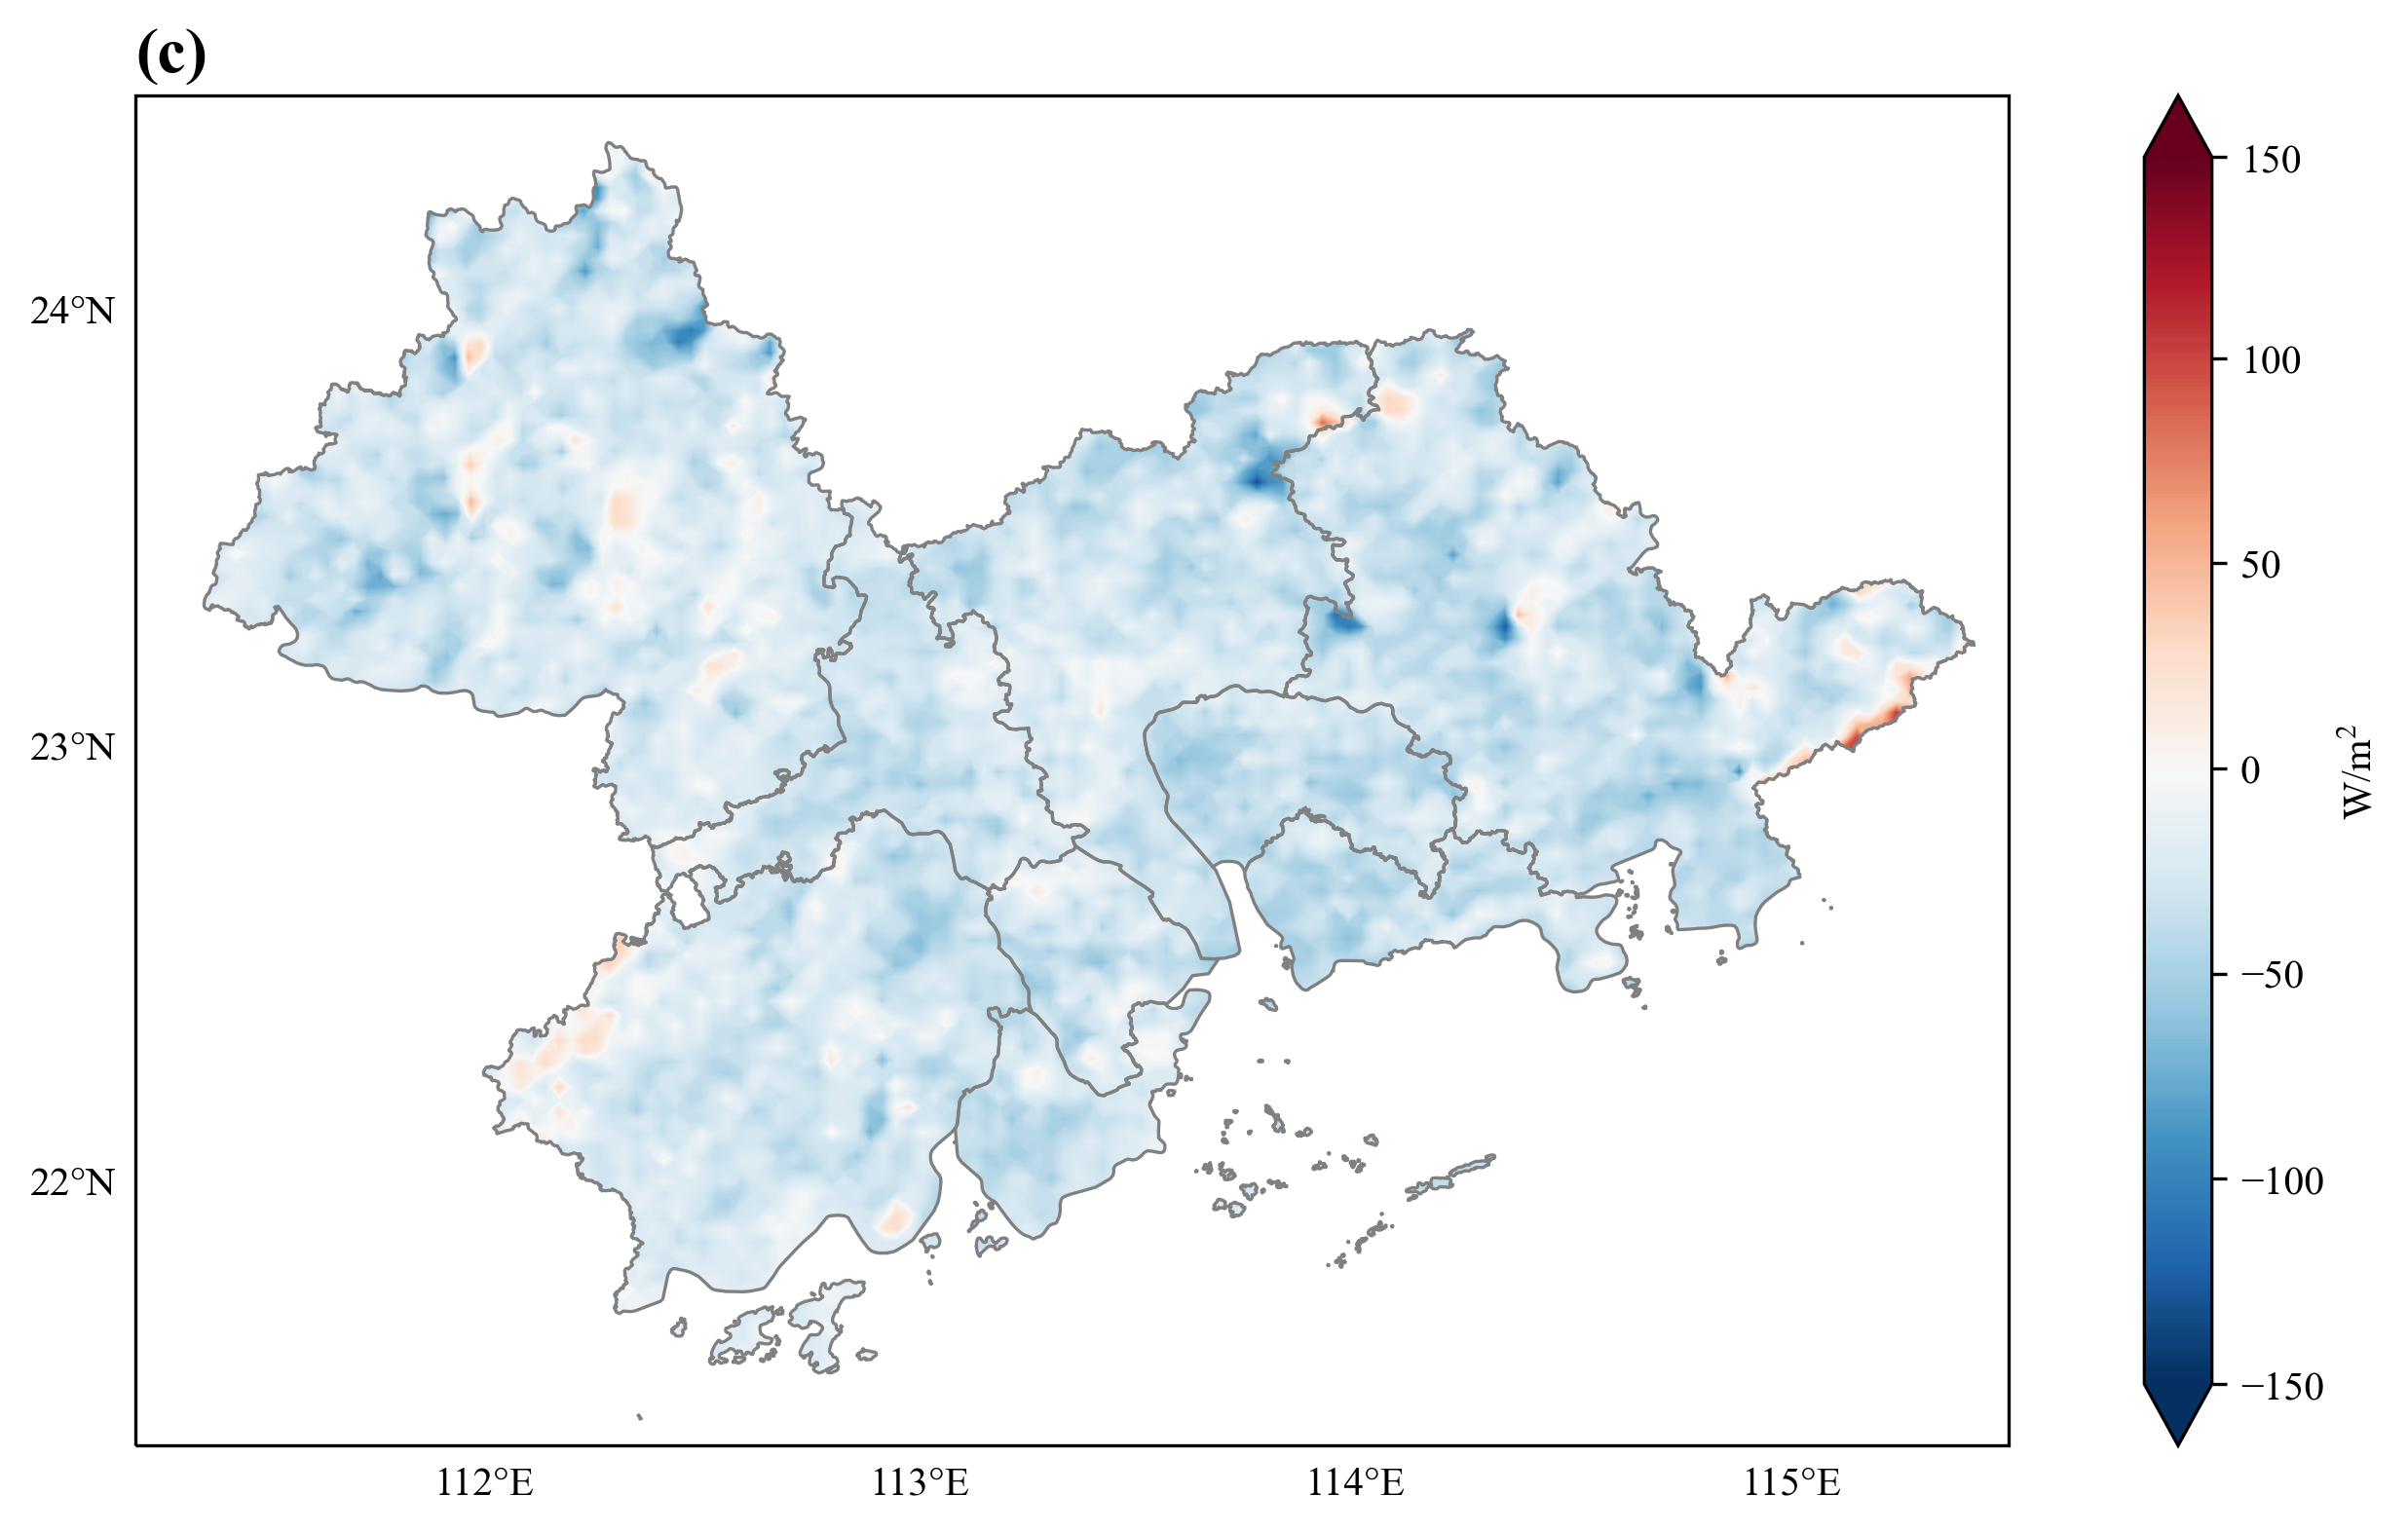

In [15]:
cmin = -150
cmax = 150
cmstep = 1
cbstep = 50

plot_PRD_diff(avg_summer, cmin, cmax, cmstep, cbstep,
              mean_summer, mean_autumn,
              title='(c)', colorbar_label='W/m$^2$')